In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
with open('alphavantage_API.rtf', 'r') as file:
    api_key = file.read().strip()

In [33]:
url = 'https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&time_from=20230605T0130&limit=200&apikey={api_key}'
r = requests.get(url)
data = r.json()

In [53]:
sentiment_scores = []
relevant_news_titles = []
relevant_news_urls = []
for item in data['feed']:
    for ticker in item['ticker_sentiment']:
        if ticker['ticker'] == 'AAPL' and float(ticker['relevance_score']) > 0.5:  # Filtrando por relevancia
            sentiment_scores.append(item['overall_sentiment_score'])
            relevant_news_titles.append(item['title'])
            relevant_news_urls.append(item['url']) 

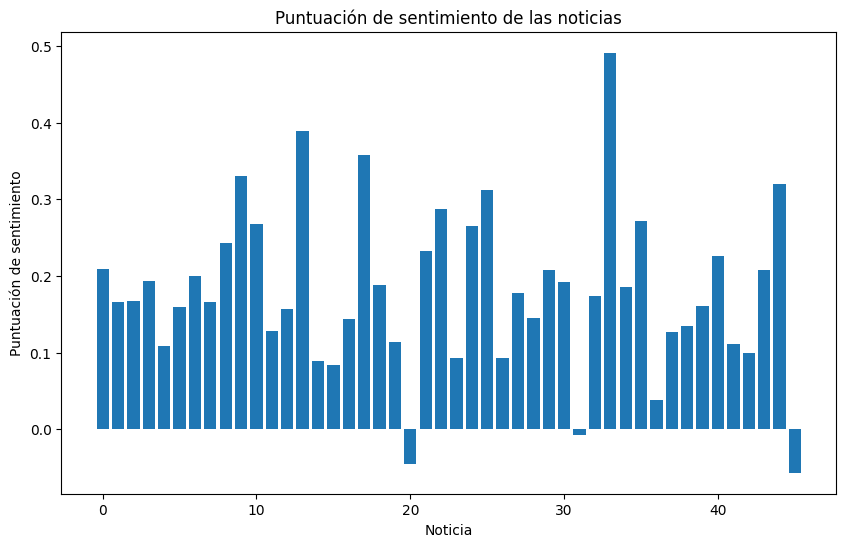

In [42]:
# Crear un bar plot de sentimientos de noticias
plt.figure(figsize=(10,6))
plt.bar(range(len(sentiment_scores)), sentiment_scores)
plt.xlabel('Noticia')
plt.ylabel('Puntuación de sentimiento')
plt.title('Puntuación de sentimiento de las noticias')
plt.show()


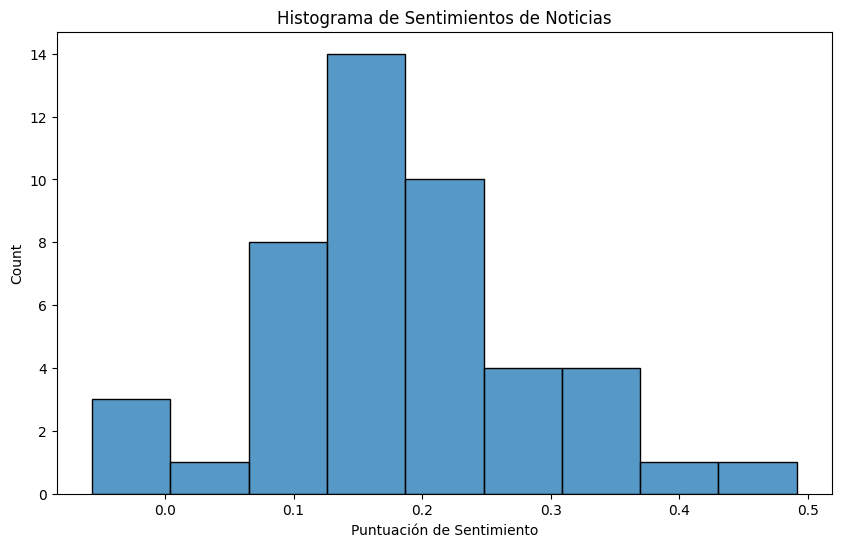

In [36]:
# Crear un histograma de sentimientos de noticias
plt.figure(figsize=(10,6))
sns.histplot(sentiment_scores, kde=False)
plt.xlabel('Puntuación de Sentimiento')
plt.title('Histograma de Sentimientos de Noticias')
plt.show()

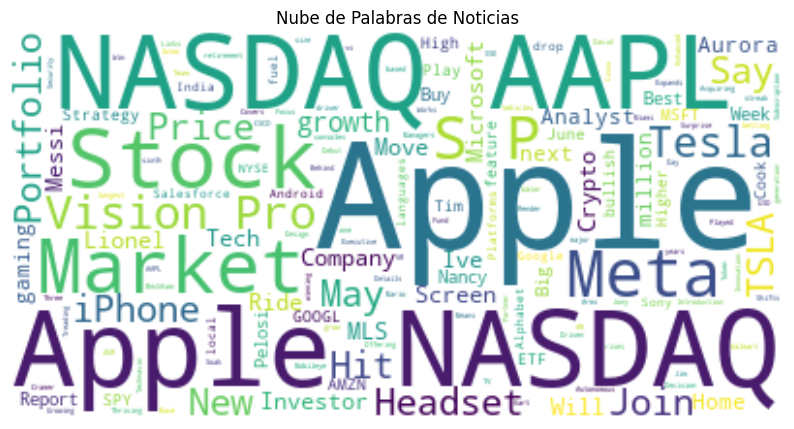

In [37]:
# Crear una nube de palabras a partir del contenido de las noticias
text = " ".join(title for title in news_titles)
wordcloud = WordCloud(background_color="white").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de Noticias')
plt.show()

In [54]:
df = pd.DataFrame({
    'Titulo': relevant_news_titles,
    'URL': relevant_news_urls,  # Agregando la columna URL al DataFrame
    'Puntuacion de Sentimiento': sentiment_scores
})

print(df.sort_values(by='Puntuacion de Sentimiento', ascending=False))


                                               Titulo  \
33  Apple Stock Hits Record High During WWDC, Tumb...   
13  Cuban's Apple Vision Pro Advice Receives Onlin...   
17  Apple  ( AAPL )  Unveils Mixed Reality Device ...   
9   Tim Cook Calls Vision Pro "Tomorrow's Engineer...   
44  Apple Investors Less Interested In AR/VR Heads...   
25  Apple's stock could be a 'table-pounder' but i...   
22  Can Apple's New VR Headset Reignite the Metave...   
35  Here are all the new software features coming ...   
10  Prediction: This Stock Will Top $5 Trillion Be...   
24  Apple's Vision Pro Is Here: 1 Major Reason Tim...   
8   Bullish On iPhone 15 Cycle, Wedbush's Ives Fur...   
21  Apple's Vision Pro is 'frightening' in the bes...   
40  Apple's stock at all-time highs ahead of WWDC,...   
0   Apple May Partner With Company Behind Render C...   
29  Apple's new mixed-reality headset only bolster...   
43   Zacks Investment Ideas feature highlights: Apple   
6   How Apple's stock can hit $